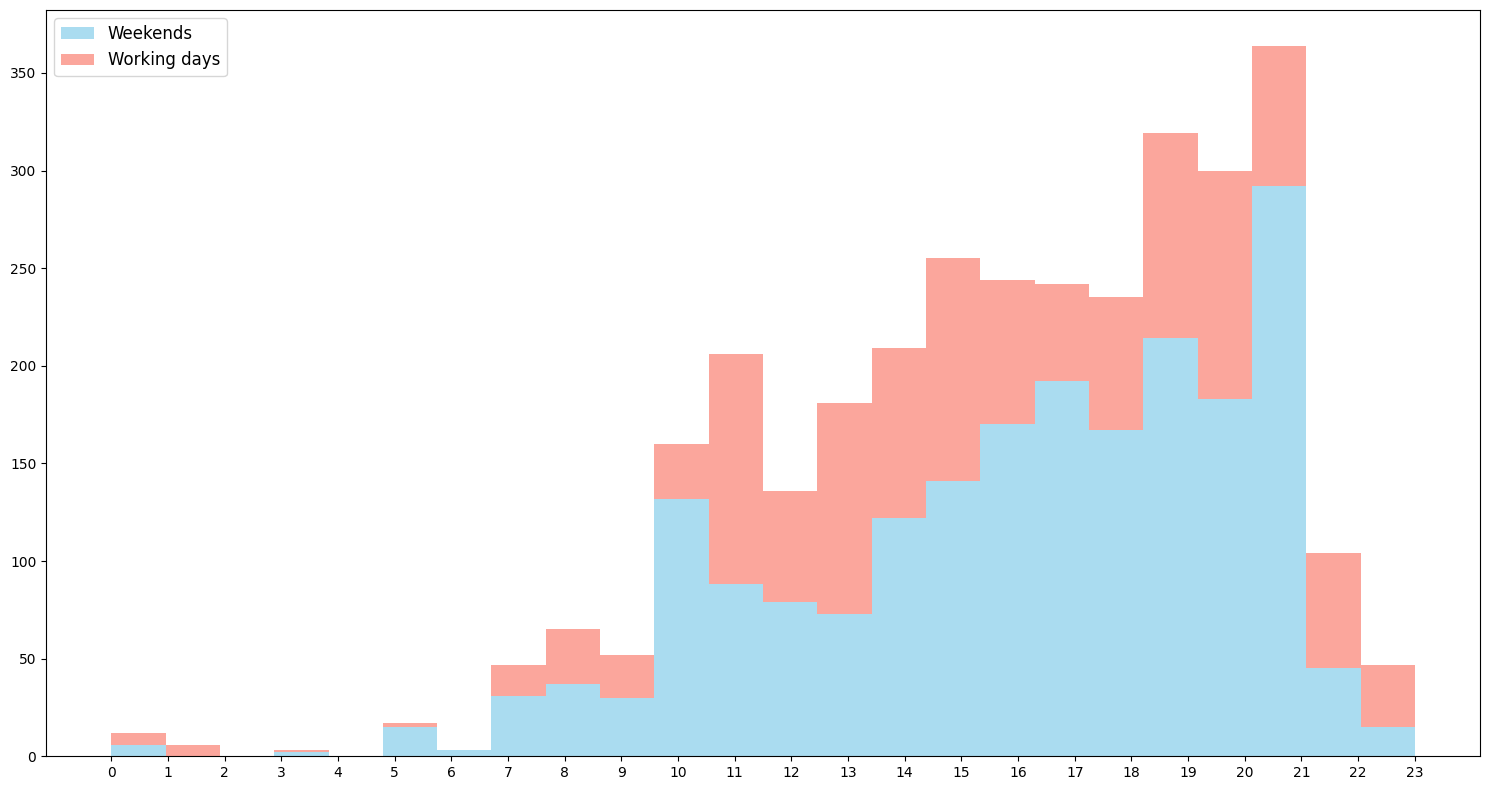

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('../../datasets/data/checking-logs.sqlite')

query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""

df = pd.read_sql(query, conn)

conn.close()

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['day_of_week'] = df['timestamp'].dt.dayofweek

def get_type_of_day(day_of_week):
    if day_of_week < 5:
        return 'weekday'
    else:
        return 'weekend'

df['type_of_day'] = df['day_of_week'].apply(get_type_of_day)

weekday_hours = df[df['type_of_day'] == 'weekday']['hour']
weekend_hours = df[df['type_of_day'] == 'weekend']['hour']

plt.figure(figsize=(15, 8))

plt.hist([weekday_hours, weekend_hours],
         bins=24,
         stacked=True,
         range=(0, 23),
         label=['Weekends', 'Working days'],
         color=['skyblue', 'salmon'],
         alpha=0.7)


plt.xticks(range(24))
plt.legend(fontsize=12)
plt.tight_layout() 
plt.show()

Are there hours when the total number of commits was higher on weekends than
on working days?

No